## Low Energy Path - Position Analysis

We developed here a position control using a PID algorithm but by selection a unique path.  The path is selected by the shortest distance computing simple eucledian distance.


PID Parameters:
- Linear
    - Distance Threshold: 0.1
    - Kp: 0.3
    - Ki: 0.03
    - Kd: 0.05
    - Max Speed: +/- 1.0
    
- Angular
    - Yaw Threshold: 0.1
    - Kp: 0.7
    - Ki: 0.02
    - Kd: 0.3
    - Max Speed: +/- 1.0

#### Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Load the log file and calculcate position and goals

In [2]:
df = pd.read_csv('log_task2.csv')

df['Goal'] = np.sqrt(df.X_Goal**2+df.Y_Goal**2)
df['Pos'] = np.sqrt(df.X_Pos**2+df.Y_Pos**2)

df.head()

,X_Goal,Y_Goal,X_Pos,Y_Pos,Goal,Pos
0,0.0000,0.000000,0.000062,2.835890e-07,0.000000,0.000062
1,-0.5709,-0.538144,0.000062,2.942780e-07,0.784555,0.000062
2,-0.5709,-0.538144,0.000062,2.995460e-07,0.784555,0.000062
3,-0.5709,-0.538144,0.001217,2.973580e-07,0.784555,0.001217
4,-0.5709,-0.538144,0.003428,-2.220810e-07,0.784555,0.003428


In [3]:
def plot_pair(var1, var2, palette, color_var1, color_var2, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, figsize=(12,6))
    
    ax = sns.lineplot(
        data=df,
        x=df.index, y=var1,
        palette=palette,
        label=var1,
        color = color_var1,
        ax=ax
    )
    
    sns.lineplot(
        data=df,
        x=df.index, y=var2,
        palette=palette,
        label=var2,
        color=color_var2,
        ax=ax
    )
    fig.suptitle(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    
    ax.legend(title="Legend", loc="upper left", fontsize=12, title_fontsize='13')

    ax.grid(True)
    
    
def plot_distributions(var1, var2, var1_color, var2_color):
    fig, ax = plt.subplots(figsize=(12,6))
    sns.histplot(df.X_Goal, color=var1_color, ax=ax, label=var1)
    sns.histplot(df.X_Pos, color=var2_color, ax=ax, label=var2)
    ax.legend();
    ax.set_xlabel(f'{var1} | {var2}')
    fig.suptitle(f'{var1} | {var2} Distributions')

#### X (Goal vs Pos) Analysis

A very smooth but slow in time trajectory is followed via the PID algorithm.  We see as a given input goal is given the robot try to approaches the path.

X position and Y position reflects a very effective control of the PID algorithm.

Moving and showing the goal results, it shows a very smooth and clear example of goal to goal success.  You can fine tune the parameters to maximize goal to goal movements and diminish overshots.

On the histograms we can see the concentration of values near the setpoints and low concentrations when traveling from one side ot another in the world.

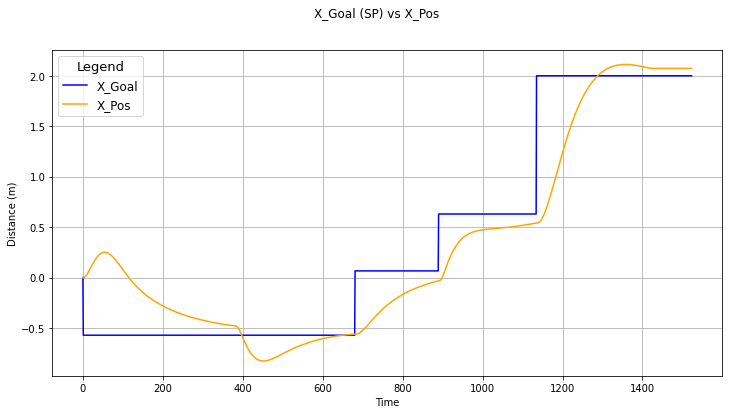

In [4]:
plot_pair(
    var1='X_Goal', 
    var2='X_Pos', 
    palette='magma', 
    color_var1='blue', 
    color_var2='orange', 
    title='X_Goal (SP) vs X_Pos', 
    xlabel='Time', 
    ylabel='Distance (m)'
)

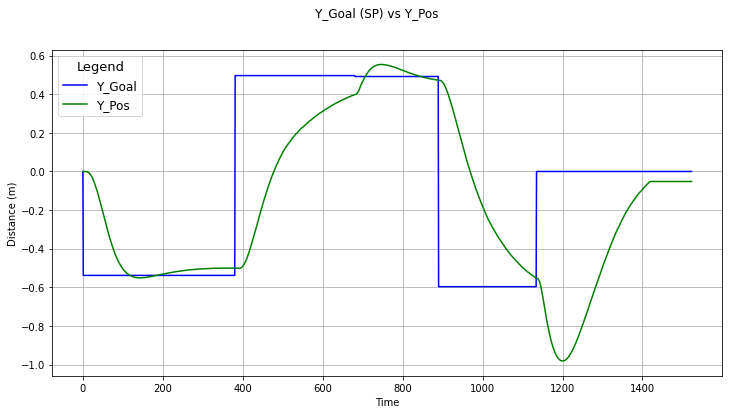

In [5]:
plot_pair(
    var1='Y_Goal', 
    var2='Y_Pos', 
    palette='viridis', 
    color_var1='blue', 
    color_var2='green', 
    title='Y_Goal (SP) vs Y_Pos', 
    xlabel='Time', 
    ylabel='Distance (m)'
)

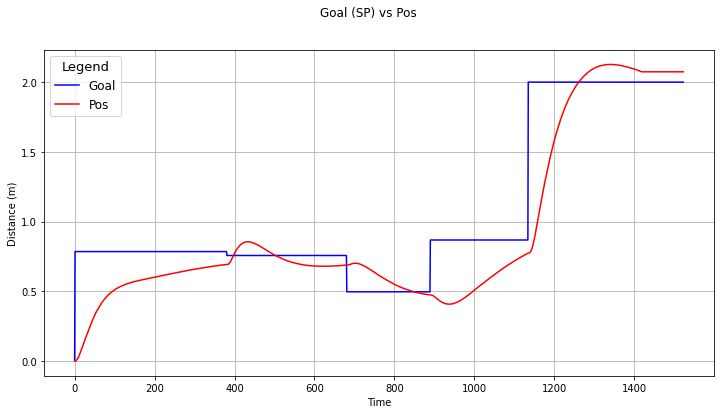

In [6]:
plot_pair(
    var1='Goal', 
    var2='Pos', 
    palette='viridis', 
    color_var1='blue', 
    color_var2='red', 
    title='Goal (SP) vs Pos', 
    xlabel='Time', 
    ylabel='Distance (m)'
)

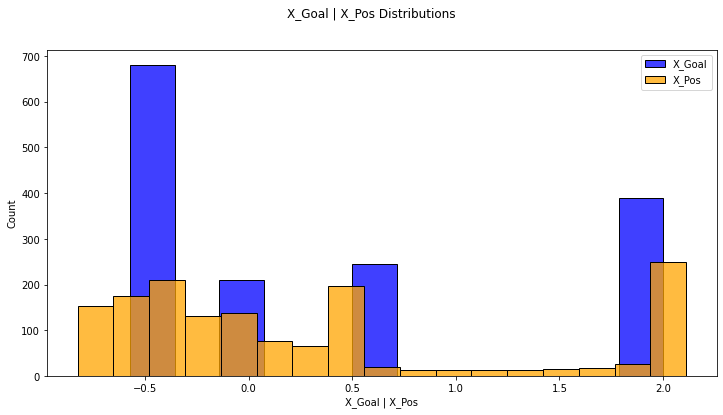

In [7]:
plot_distributions(var1='X_Goal', var2='X_Pos', var1_color='blue', var2_color='orange')

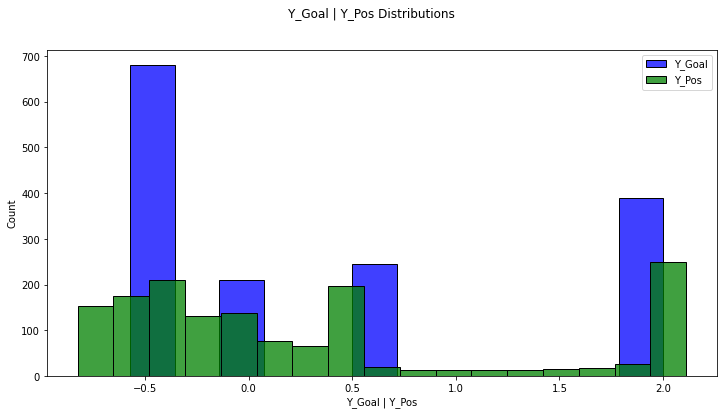

In [8]:
plot_distributions(var1='Y_Goal', var2='Y_Pos', var1_color='blue', var2_color='green')

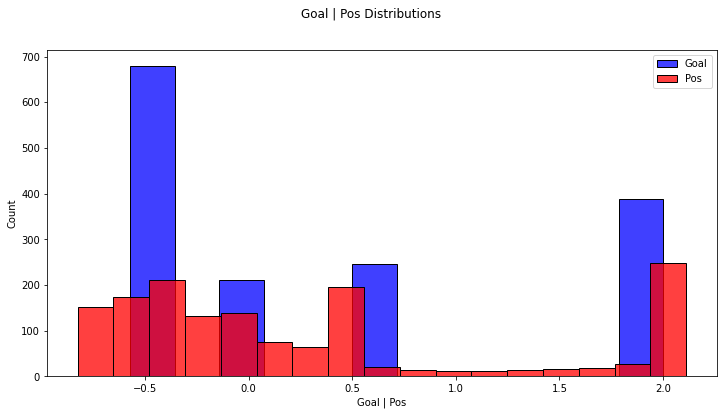

In [9]:
plot_distributions(var1='Goal', var2='Pos', var1_color='blue', var2_color='red')